<a href="https://colab.research.google.com/github/IgorNascAlves/Gerador-de-Dados-Simulados/blob/main/criacao_e_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando Json que descreve o produto

O arquivo "produtos.json" contém um objeto JSON com uma lista de 200 produtos. Cada produto é representado por um objeto JSON com as seguintes propriedades:

"Nome do Produto": string com o nome do produto
"Marca": lista de strings com as marcas do produto
"Maior Preço": número decimal com o preço máximo do produto
"Menor Preço": número decimal com o preço mínimo do produto
"Categoria": string com a categoria do produto (ex: alimentos, limpeza, eletrônicos, etc)
"Peso": string com a unidade de medida e o peso do produto (ex: "kg 1.5", "g 500")
Essa estrutura foi criada para armazenar informações sobre 200 produtos de mercado, incluindo nome, marcas, preços, categorias e pesos, para serem utilizados em análises e simulações de compras.

In [20]:
!wget https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/produtos.json

--2023-03-28 17:45:35--  https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/produtos.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4281 (4.2K) [text/plain]
Saving to: ‘produtos.json.1’

produtos.json.1     100%[===================>]   4.18K  --.-KB/s    in 0s      

2023-03-28 17:45:35 (40.0 MB/s) - ‘produtos.json.1’ saved [4281/4281]



# Gerador de base utilizando json que descreve a base

In [21]:
import json
import random
import csv
from datetime import datetime, timedelta

# Lê o arquivo JSON com a lista de produtos
with open('produtos.json') as f:
    produtos = json.load(f)

# Define as datas para gerar as compras
data_inicio = datetime(2023, 1, 1)
data_fim = datetime(2023, 3, 31)

# Gera a base de CSV
with open('compras.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Nome do Produto', 'Marca', 'Preço', 'Custo', 'Data da Venda', 'Data da Compra', 'Categoria', 'Peso'])
    for i in range(1000):
        # Seleciona um produto aleatório
        produto = random.choice(produtos)
        marca = random.choice(produto['marcas'])
        preco = round(random.uniform(produto['menor_preco'], produto['maior_preco']), 2)
        custo = round(preco * random.uniform(0.7, 0.9), 2)
        data_venda = data_inicio + timedelta(days=random.randint(0, (data_fim - data_inicio).days))
        data_compra = data_venda - timedelta(days=random.randint(0, 30))
        categoria = produto['categoria']
        peso = produto['peso']
        # Escreve a linha no CSV
        writer.writerow([produto['produto'], marca, preco, custo, data_venda.strftime('%d/%m/%Y'), data_compra.strftime('%d/%m/%Y'), categoria, peso])


# Analisando a base

In [22]:
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Lê o arquivo CSV com as compras
compras = pd.read_csv('compras.csv')


In [25]:
# Mostra as primeiras linhas do DataFrame
display(compras.head())


,Nome do Produto,Marca,Preço,Custo,Data da Venda,Data da Compra,Categoria,Peso
0,Fogão,Brastemp,3031.51,2430.83,21/03/2023,24/02/2023,Eletrodomésticos,50kg
1,Pão de Forma,Nutrella,4.89,3.87,31/01/2023,09/01/2023,Alimentos,500g
2,Leite em Pó,Parmalat,21.94,17.07,16/01/2023,14/01/2023,Alimentos,800g
3,Açúcar,Da Barra,4.94,4.34,03/01/2023,17/12/2022,Alimentos,1kg
4,Televisor,Samsung,5833.19,5137.16,20/01/2023,28/12/2022,Eletrônicos,25kg


In [26]:
# Mostra informações sobre as colunas do DataFrame
display(compras.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome do Produto  1000 non-null   object 
 1   Marca            1000 non-null   object 
 2   Preço            1000 non-null   float64
 3   Custo            1000 non-null   float64
 4   Data da Venda    1000 non-null   object 
 5   Data da Compra   1000 non-null   object 
 6   Categoria        1000 non-null   object 
 7   Peso             1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


None

In [27]:
# Mostra estatísticas descritivas do DataFrame
display(compras.describe())


,Preço,Custo
count,1000.00000,1000.000000
mean,1835.25639,1461.034830
std,2220.62232,1773.639517
min,3.02000,2.190000
25%,7.42750,5.787500
50%,266.54000,199.850000
75%,3432.99250,2779.227500
max,7932.93000,6515.290000


In [28]:
# Agrupa as compras por categoria e calcula a quantidade vendida e o faturamento
vendas_por_categoria = compras.groupby('Categoria').agg({'Nome do Produto': 'count', 'Preço': 'sum'}).reset_index()
vendas_por_categoria.columns = ['Categoria', 'Quantidade Vendida', 'Faturamento']


In [29]:
# Mostra a tabela com as vendas por categoria
display(vendas_por_categoria)


,Categoria,Quantidade Vendida,Faturamento
0,Alimentos,500,4993.82
1,Eletrodomésticos,161,683790.83
2,Eletrônicos,339,1146471.74


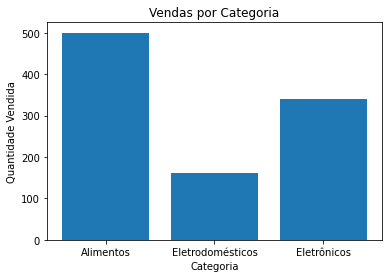

In [30]:
# Plota um gráfico de barras com as vendas por categoria
plt.bar(vendas_por_categoria['Categoria'], vendas_por_categoria['Quantidade Vendida'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.title('Vendas por Categoria')
plt.show()


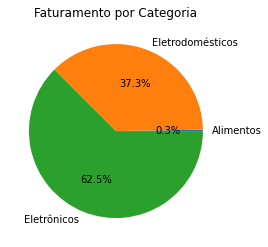

In [31]:
# Plota um gráfico de pizza com o faturamento por categoria
plt.pie(vendas_por_categoria['Faturamento'], labels=vendas_por_categoria['Categoria'], autopct='%1.1f%%')
plt.title('Faturamento por Categoria')
plt.show()


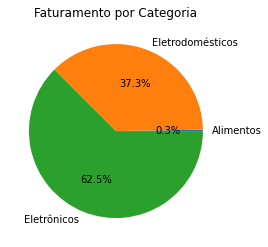

In [32]:
# Plota um gráfico de pizza com o faturamento por categoria
plt.pie(vendas_por_categoria['Faturamento'], labels=vendas_por_categoria['Categoria'], autopct='%1.1f%%')
plt.title('Faturamento por Categoria')
plt.show()


In [33]:
# Agrupa as compras por marca e calcula a quantidade vendida e o faturamento
vendas_por_marca = compras.groupby('Marca').agg({'Nome do Produto': 'count', 'Preço': 'sum'}).reset_index()
vendas_por_marca.columns = ['Marca', 'Quantidade Vendida', 'Faturamento']
vendas_por_marca = vendas_por_marca.sort_values('Faturamento', ascending=False).head(10)


In [34]:
# Mostra a tabela com as vendas por marca (top 10)
display(vendas_por_marca)


,Marca,Quantidade Vendida,Faturamento
46,Samsung,64,265417.04
16,Electrolux,48,198018.01
7,Brastemp,47,183762.14
12,Consul,34,151374.30
50,Sony,35,114867.91
35,Philips,17,98780.25
25,Lenovo,32,95923.93
20,HP,18,93556.38
24,LG,15,83258.25
3,Asus,14,70428.45


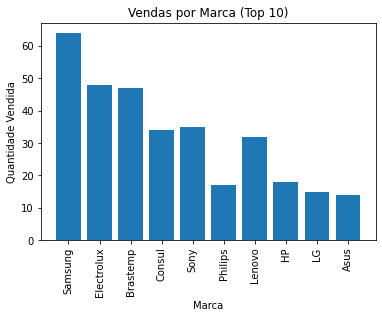

In [35]:
# Plota um gráfico de barras com as vendas por marca (top 10)
plt.bar(vendas_por_marca['Marca'], vendas_por_marca['Quantidade Vendida'])
plt.xlabel('Marca')
plt.ylabel('Quantidade Vendida')
plt.title('Vendas por Marca (Top 10)')
plt.xticks(rotation=90)
plt.show()


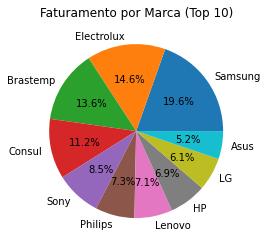

In [36]:
# Plota um gráfico de pizza com o faturamento por marca (top 10)
plt.pie(vendas_por_marca['Faturamento'], labels=vendas_por_marca['Marca'], autopct='%1.1f%%')
plt.title('Faturamento por Marca (Top 10)')
plt.show()
